In [82]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def round_to_hour(t):
    sp = list(map(lambda x : int(x), t.split(':')))
    if sp[2] >= 30:
        sp[1] += 1
    if sp[1] >= 30:
        sp[0] += 1
    return sp[0]

In [8]:
df = pd.read_csv('BreadBasket_DMS.csv')

In [17]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [18]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [32]:
df['hour'] = df.Time.apply(round_to_hour)

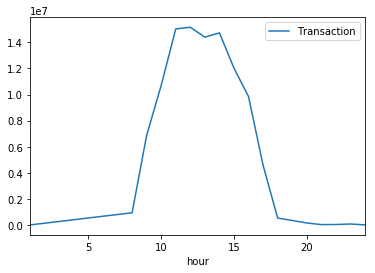

In [47]:
%matplotlib inline
df.groupby('hour').sum().plot()

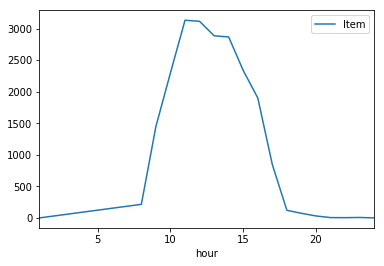

In [51]:
%matplotlib inline
df.groupby('hour').count()[['Item']].plot()

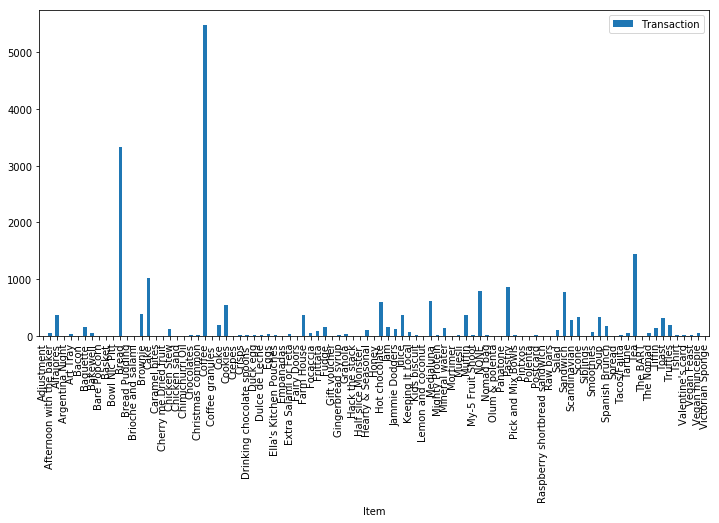

In [67]:
%matplotlib inline
df.groupby('Item').count()[['Transaction']].plot.bar(figsize=(12, 6))

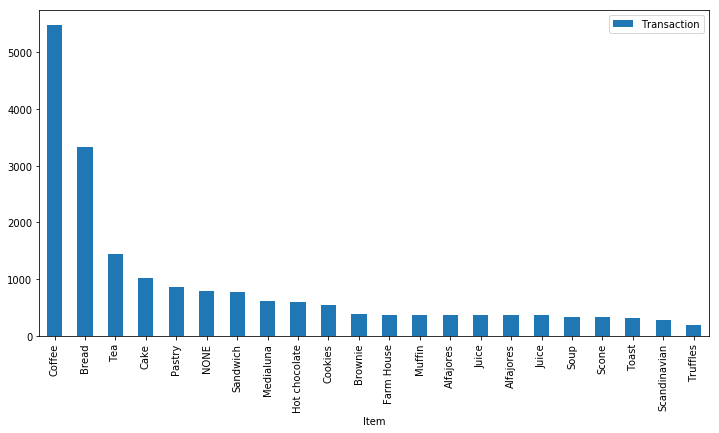

In [76]:
(df.groupby('Item').count()[['Transaction']]
.sort_values('Transaction', ascending=False)
.nlargest(20, 'Transaction')
.plot.bar(figsize=(12, 6)))

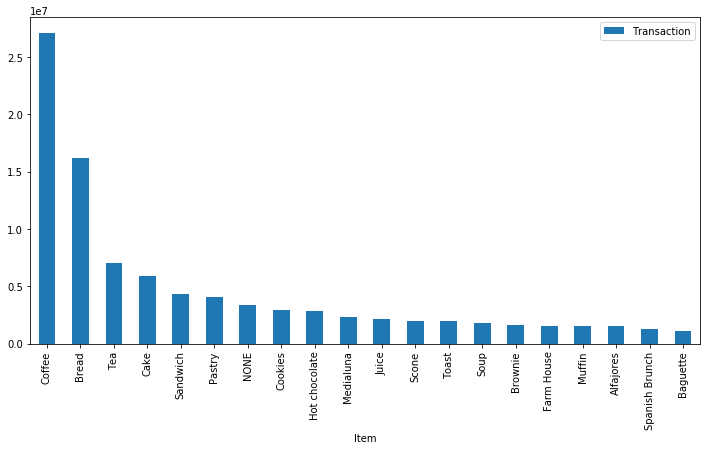

In [77]:
(df.groupby('Item').sum()[['Transaction']]
.sort_values('Transaction', ascending=False)
.nlargest(20, 'Transaction')
.plot.bar(figsize=(12, 6)))

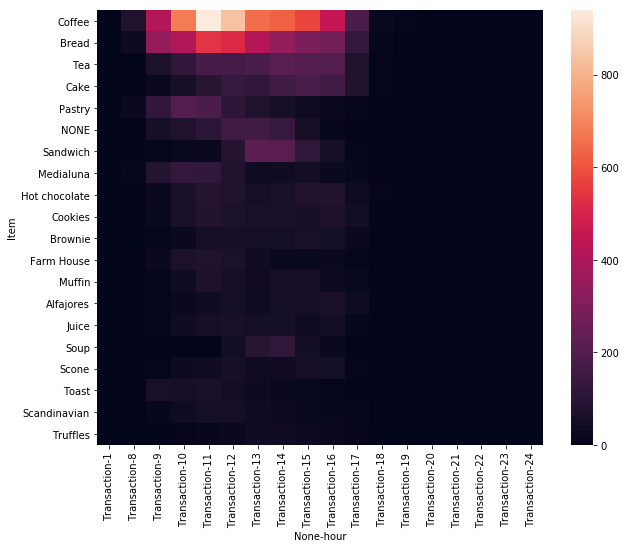

In [207]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(gdf.unstack().fillna(0).loc[list(gdf.unstack().sum(axis=1).sort_values(ascending=False)[:20].keys())]
, annot=False, ax = ax)